In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

In [6]:
class AudioFeatureAnalysis:
    def __init__(self, audio_file_paths):
        # Load multiple audio file paths
        self.audio_file_paths = audio_file_paths
        self.audio_data = []  # Store audio data and sampling rate for each file
        self.load_audio_files()

    def load_audio_files(self):
        for file_path in self.audio_file_paths:
            try:
                # Load each audio file
                audio, sr = librosa.load(file_path)
                self.audio_data.append((audio, sr, file_path))
            except Exception as e:
                print(f"Error loading {file_path}: {e}")

    def extract_features(self, audio, sr):
        # Extract audio features for a single file
        mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
        chroma = librosa.feature.chroma_stft(y=audio, sr=sr)
        spectral_contrast = librosa.feature.spectral_contrast(y=audio, sr=sr)
        zero_crossings = librosa.feature.zero_crossing_rate(y=audio)
        tempo, beat_frames = librosa.beat.beat_track(y=audio, sr=sr)

        return {
            "mfcc": mfcc,
            "chroma": chroma,
            "spectral_contrast": spectral_contrast,
            "zero_crossings": zero_crossings,
            "tempo": tempo,
            "beat_frames": beat_frames
        }

    def plot_waveform(self, audio, sr, title="Waveform"):
        # Plot the waveform of the audio file
        plt.figure(figsize=(10, 4))
        librosa.display.waveshow(audio, sr=sr)
        plt.title(title)
        plt.show()

    def plot_mfcc(self, mfcc, sr, title="MFCC"):
        # Plot MFCCs
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(mfcc, sr=sr, x_axis='time')
        plt.colorbar()
        plt.title(title)
        plt.tight_layout()
        plt.show()

    def plot_chroma(self, chroma, sr, title="Chroma Feature"):
        # Plot Chroma feature
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma')
        plt.colorbar()
        plt.title(title)
        plt.tight_layout()
        plt.show()

    def plot_spectral_contrast(self, spectral_contrast, sr, title="Spectral Contrast"):
        # Plot Spectral Contrast
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(spectral_contrast, sr=sr, x_axis='time')
        plt.colorbar()
        plt.title(title)
        plt.tight_layout()
        plt.show()

    def plot_zero_crossings(self, zero_crossings, title="Zero-Crossing Rate"):
        # Plot Zero-Crossing Rate
        plt.figure(figsize=(10, 4))
        plt.plot(zero_crossings[0])
        plt.title(title)
        plt.tight_layout()
        plt.show()

    def summary(self, features, file_path):
        # Print a summary of the extracted features for a file
        print(f"\nFile: {file_path}")
        
        # Handle tempo formatting (taking the first element of the array)
        if isinstance(features['tempo'], np.ndarray):
            print(f"Tempo: {features['tempo'][0]:.2f} BPM")
        else:
            print(f"Tempo: {features['tempo']:.2f} BPM")
        
        print(f"Number of beats: {len(features['beat_frames'])}")
        print(f"MFCC shape: {features['mfcc'].shape}")
        print(f"Chroma shape: {features['chroma'].shape}")
        print(f"Spectral contrast shape: {features['spectral_contrast'].shape}")
        print(f"Zero-crossing rate shape: {features['zero_crossings'].shape}")

    def perform_analysis(self):
        # Perform feature extraction and visualization for all audio files
        for audio, sr, file_path in self.audio_data:
            print(f"\nAnalyzing file: {file_path}")
            
            # Extract features for the current file
            features = self.extract_features(audio, sr)

            # Plot features for each file
            self.plot_waveform(audio, sr, title=f"Waveform - {file_path}")
            self.plot_mfcc(features["mfcc"], sr, title=f"MFCC - {file_path}")
            self.plot_chroma(features["chroma"], sr, title=f"Chroma Feature - {file_path}")
            self.plot_spectral_contrast(features["spectral_contrast"], sr, title=f"Spectral Contrast - {file_path}")
            self.plot_zero_crossings(features["zero_crossings"], title=f"Zero-Crossing Rate - {file_path}")
            
            # Print the summary of features
            self.summary(features, file_path)

In [7]:
audio_files = [
    'extracted_audio_files/TESS_Toronto_emotional_speech_set_data/OAF_angry/OAF_back_angry.wav',
    'extracted_audio_files/TESS_Toronto_emotional_speech_set_data/OAF_disgust/OAF_back_disgust.wav',
    'extracted_audio_files/TESS_Toronto_emotional_speech_set_data/OAF_Fear/OAF_back_fear.wav',
    'extracted_audio_files/TESS_Toronto_emotional_speech_set_data/OAF_happy/OAF_back_happy.wav',
    'extracted_audio_files/TESS_Toronto_emotional_speech_set_data/OAF_neutral/OA_bite_neutral.wav',
    'extracted_audio_files/TESS_Toronto_emotional_speech_set_data/OAF_Pleasant_surprise/OAF_back_ps.wav',
    'extracted_audio_files/TESS_Toronto_emotional_speech_set_data/OAF_Sad/OAF_back_sad.wav'
]

In [8]:
analyzer = AudioFeatureAnalysis(audio_files)

In [ ]:
analyzer.perform_analysis()


Analyzing file: extracted_audio_files/TESS_Toronto_emotional_speech_set_data/OAF_angry/OAF_back_angry.wav


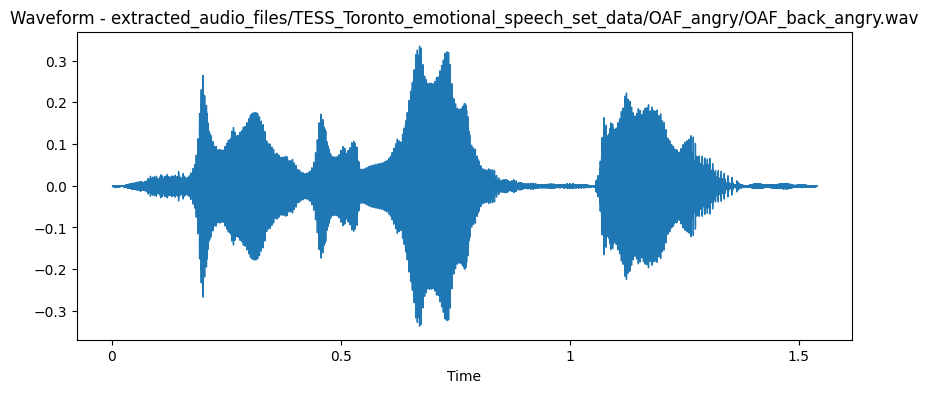

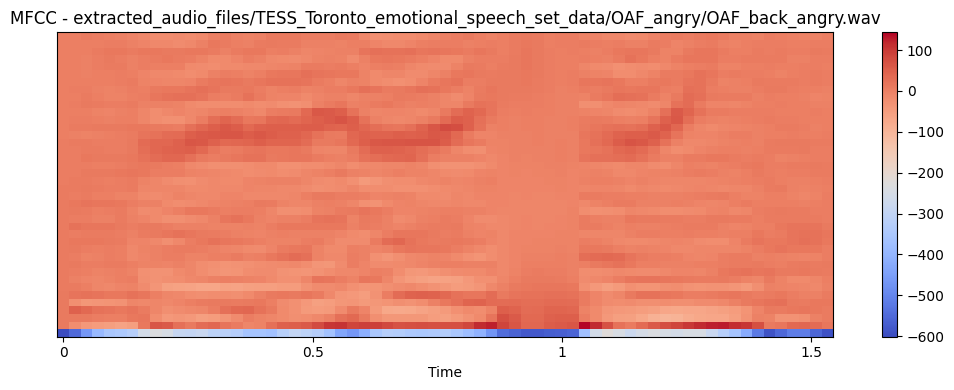

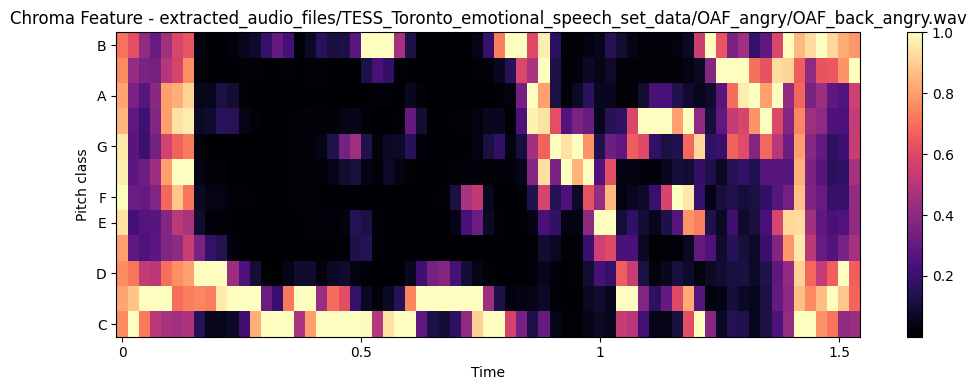

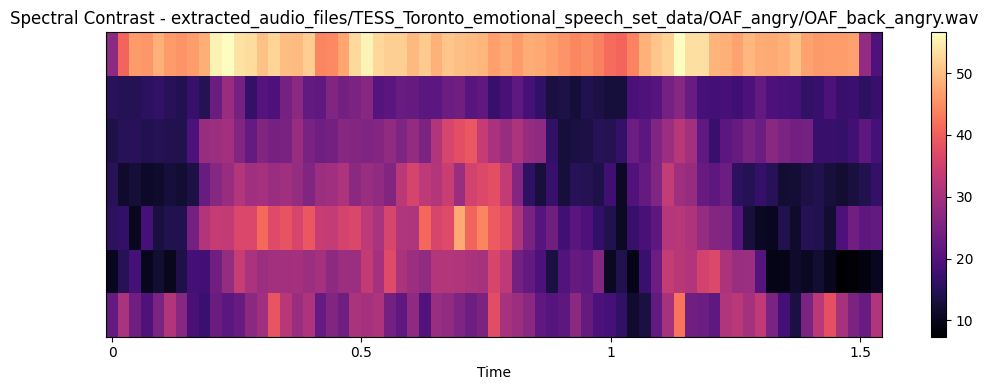

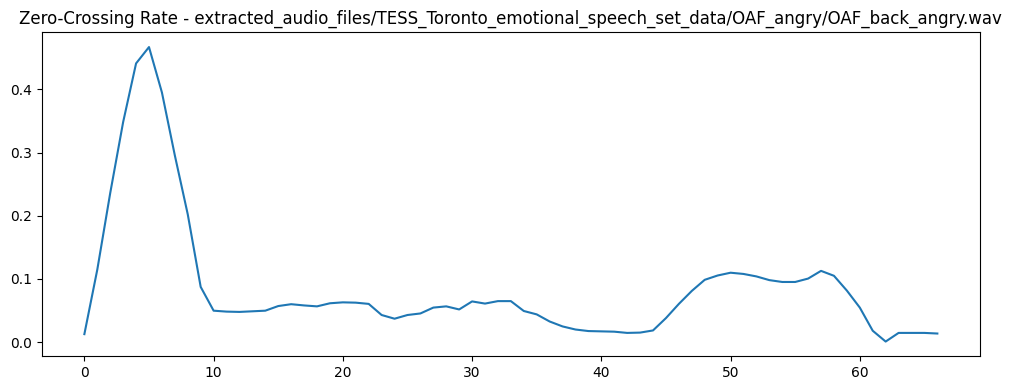


File: extracted_audio_files/TESS_Toronto_emotional_speech_set_data/OAF_angry/OAF_back_angry.wav
Tempo: 143.55 BPM
Number of beats: 3
MFCC shape: (40, 67)
Chroma shape: (12, 67)
Spectral contrast shape: (7, 67)
Zero-crossing rate shape: (1, 67)

Analyzing file: extracted_audio_files/TESS_Toronto_emotional_speech_set_data/OAF_disgust/OAF_back_disgust.wav


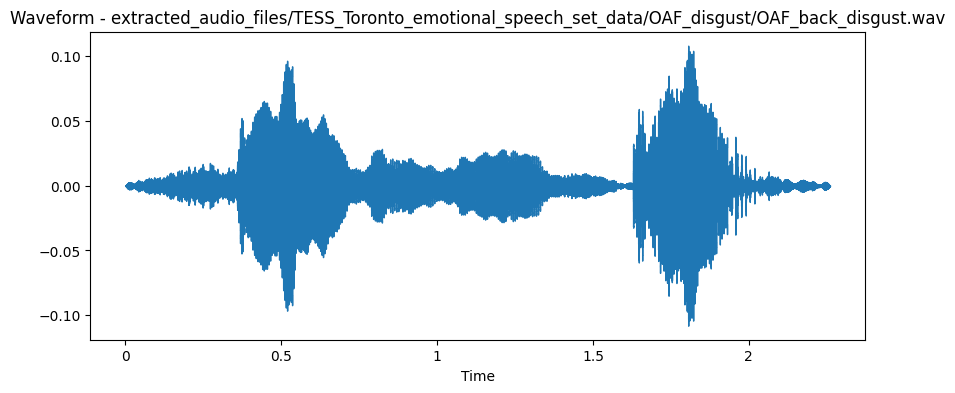

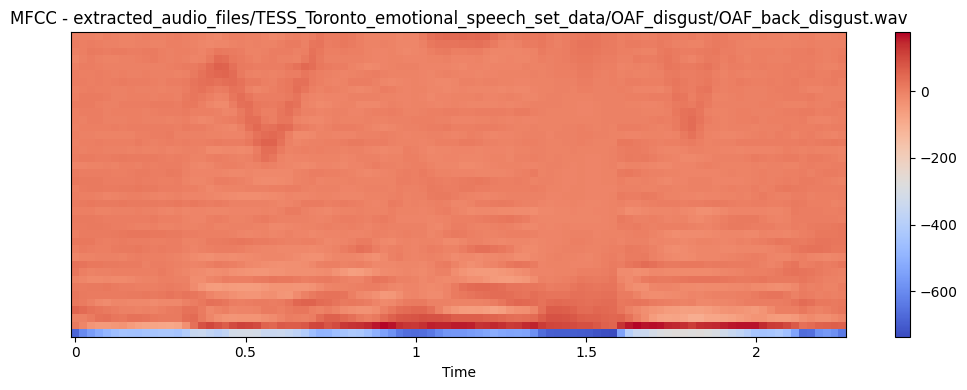

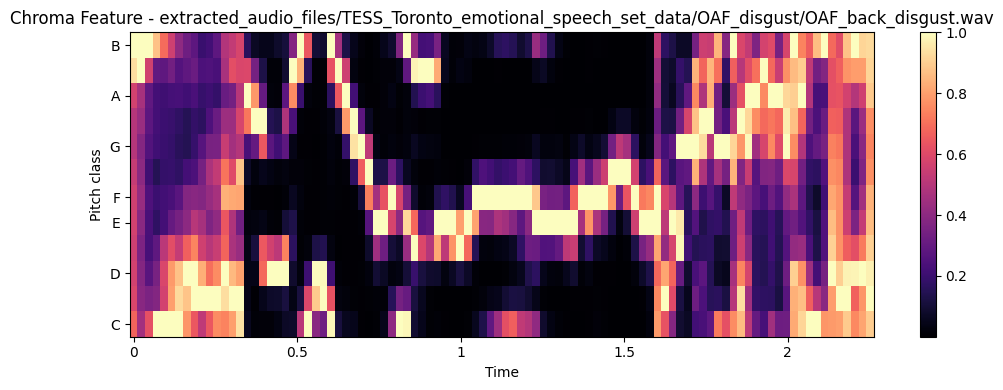

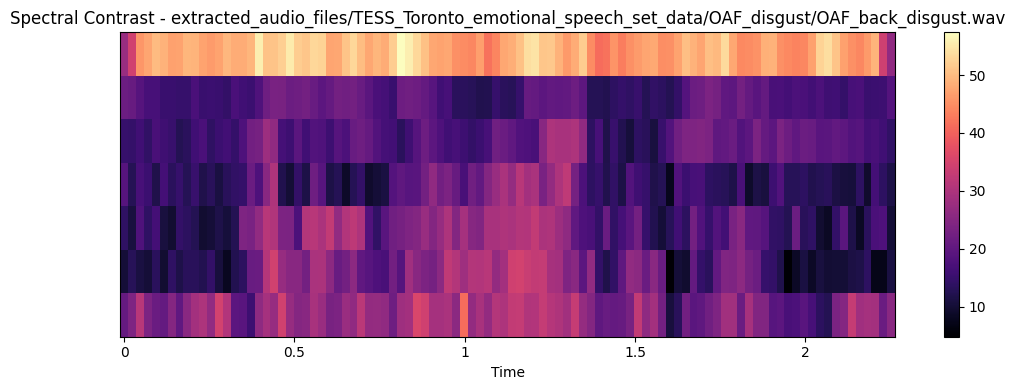

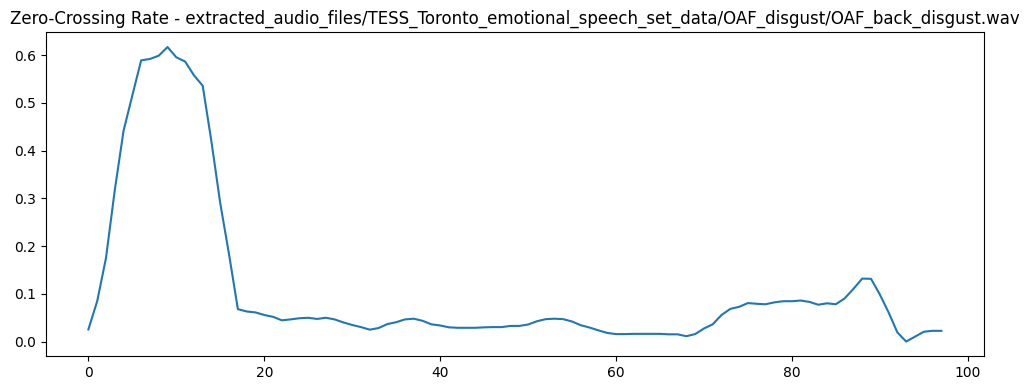


File: extracted_audio_files/TESS_Toronto_emotional_speech_set_data/OAF_disgust/OAF_back_disgust.wav
Tempo: 103.36 BPM
Number of beats: 5
MFCC shape: (40, 98)
Chroma shape: (12, 98)
Spectral contrast shape: (7, 98)
Zero-crossing rate shape: (1, 98)

Analyzing file: extracted_audio_files/TESS_Toronto_emotional_speech_set_data/OAF_Fear/OAF_back_fear.wav


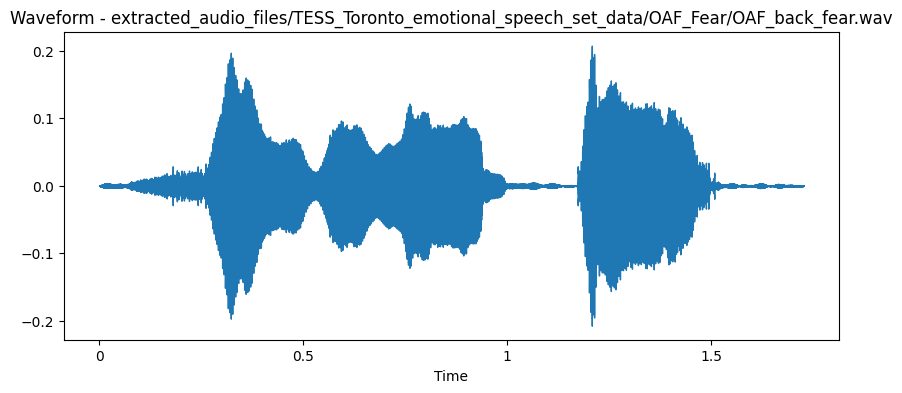

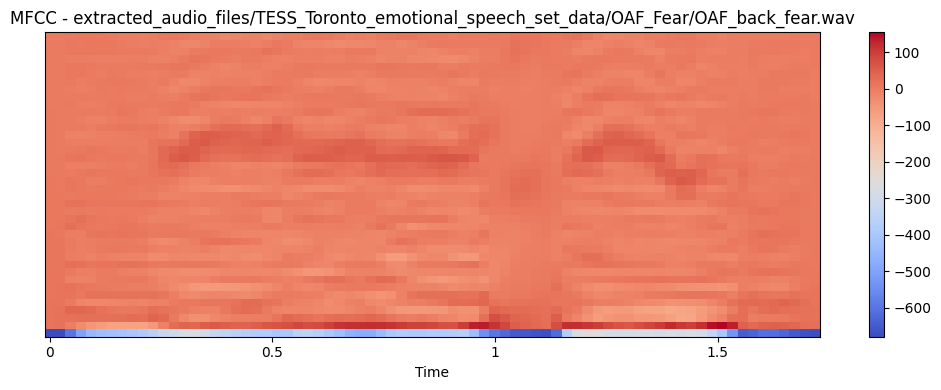

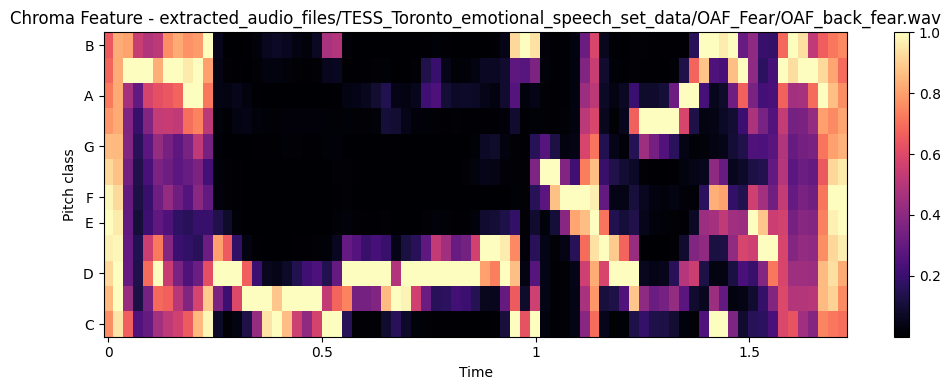

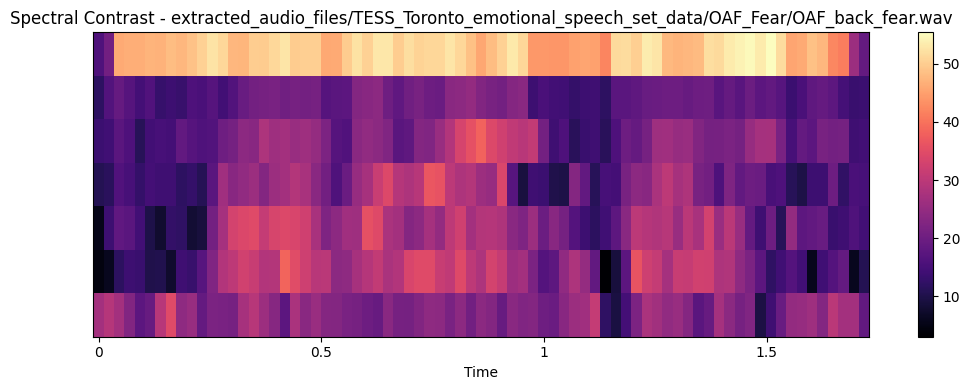

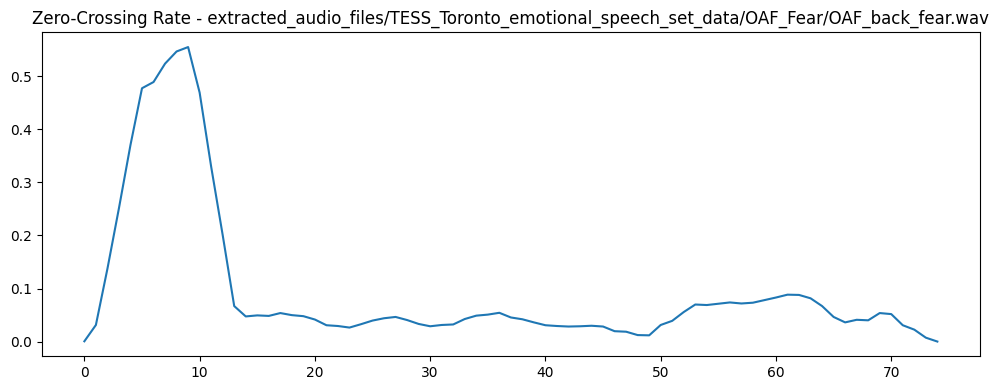


File: extracted_audio_files/TESS_Toronto_emotional_speech_set_data/OAF_Fear/OAF_back_fear.wav
Tempo: 54.98 BPM
Number of beats: 2
MFCC shape: (40, 75)
Chroma shape: (12, 75)
Spectral contrast shape: (7, 75)
Zero-crossing rate shape: (1, 75)

Analyzing file: extracted_audio_files/TESS_Toronto_emotional_speech_set_data/OAF_happy/OAF_back_happy.wav


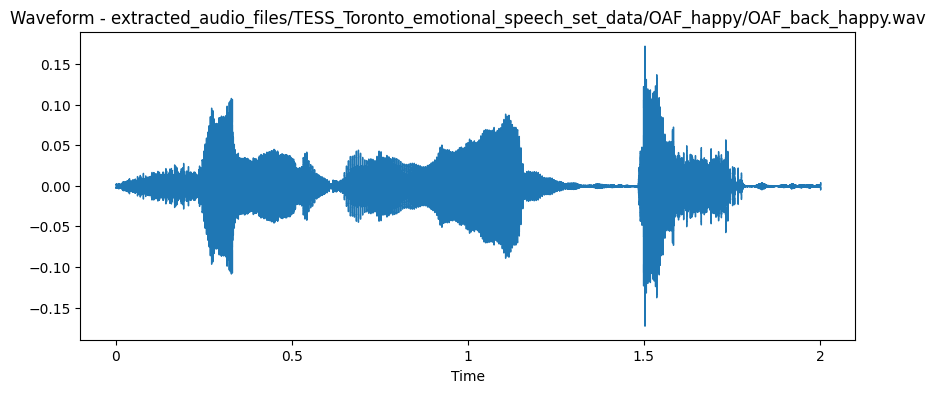

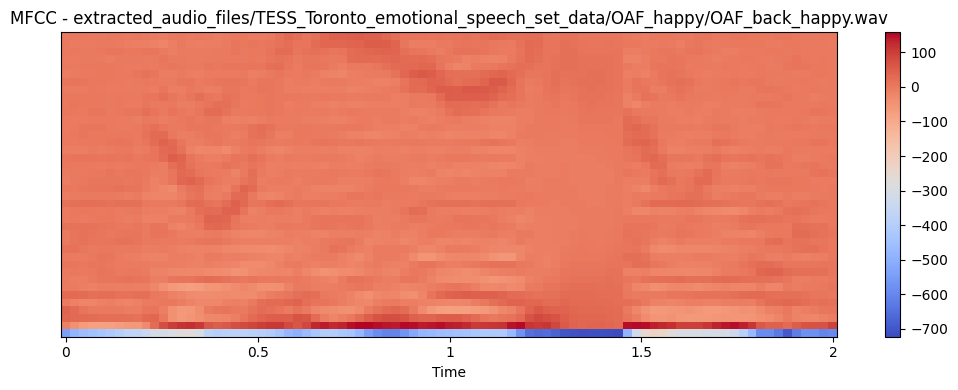

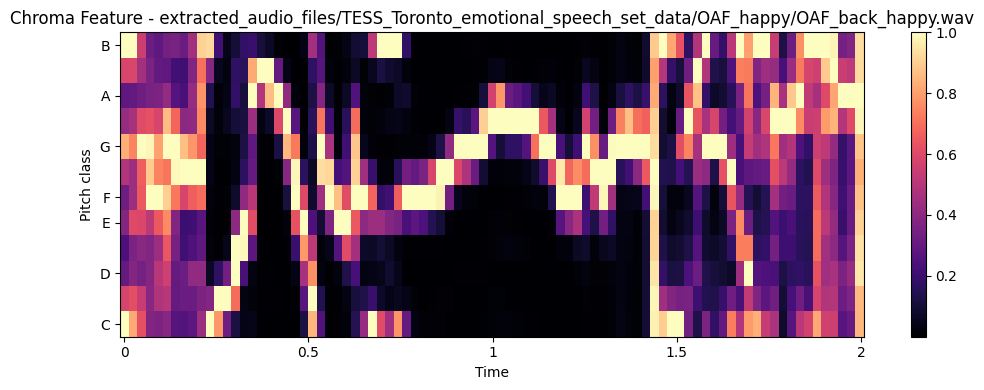

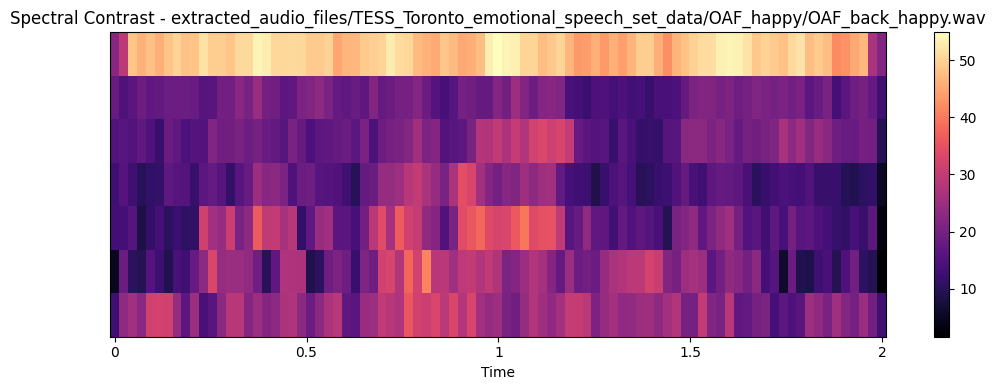

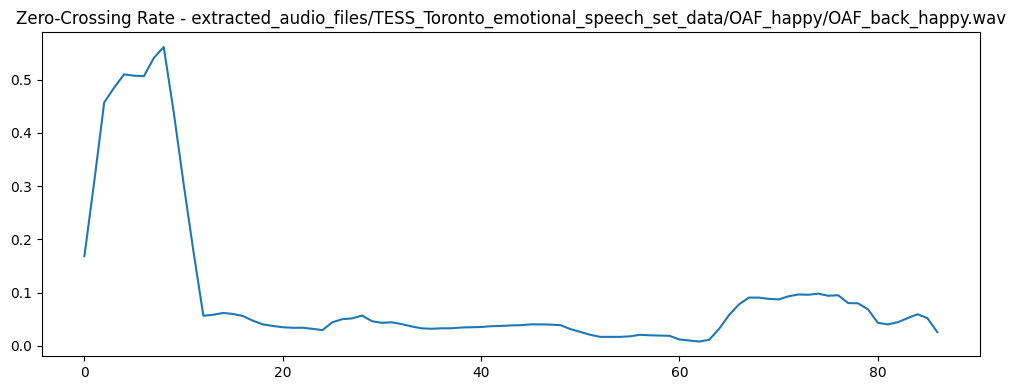


File: extracted_audio_files/TESS_Toronto_emotional_speech_set_data/OAF_happy/OAF_back_happy.wav
Tempo: 136.00 BPM
Number of beats: 1
MFCC shape: (40, 87)
Chroma shape: (12, 87)
Spectral contrast shape: (7, 87)
Zero-crossing rate shape: (1, 87)

Analyzing file: extracted_audio_files/TESS_Toronto_emotional_speech_set_data/OAF_neutral/OA_bite_neutral.wav


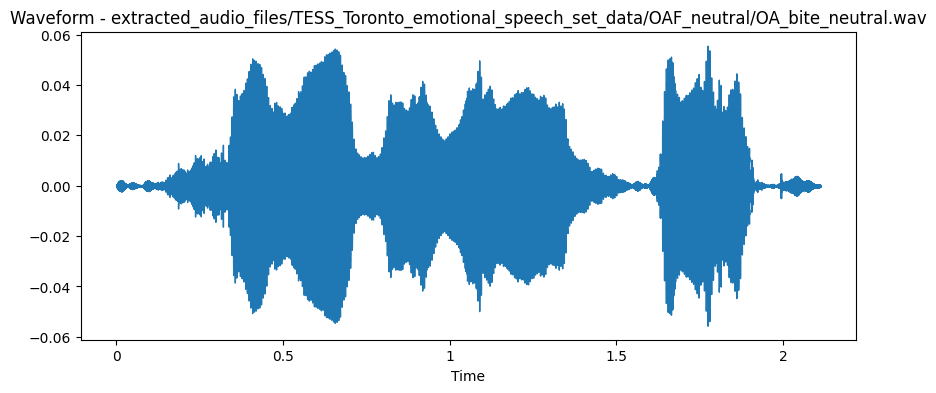

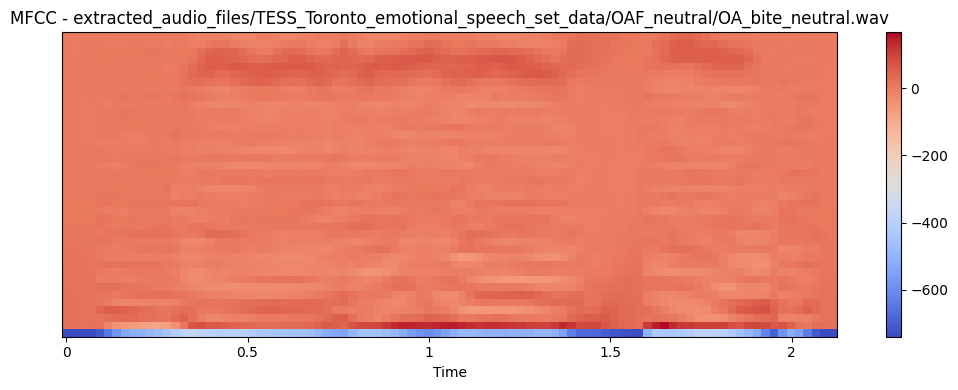

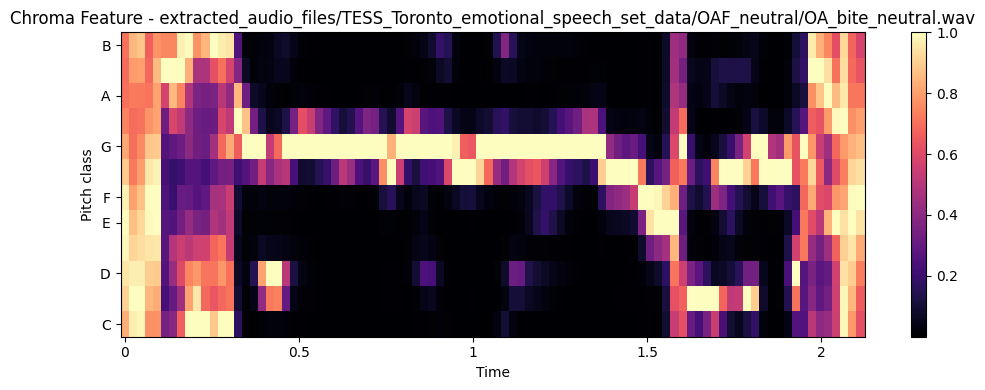

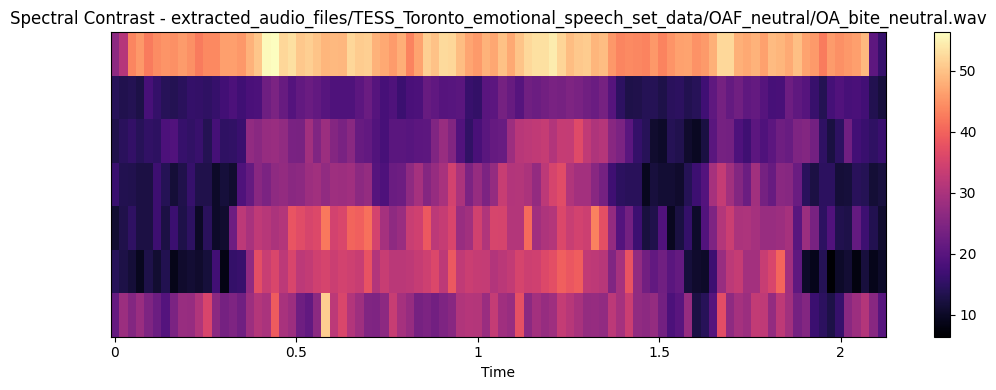

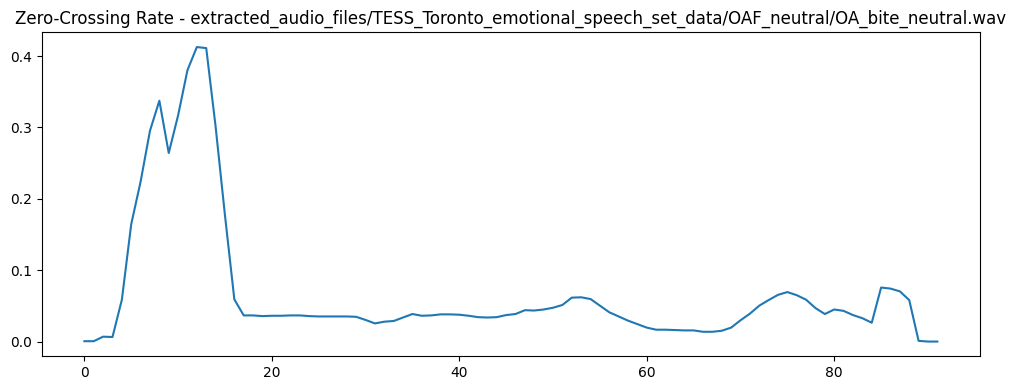


File: extracted_audio_files/TESS_Toronto_emotional_speech_set_data/OAF_neutral/OA_bite_neutral.wav
Tempo: 161.50 BPM
Number of beats: 6
MFCC shape: (40, 92)
Chroma shape: (12, 92)
Spectral contrast shape: (7, 92)
Zero-crossing rate shape: (1, 92)

Analyzing file: extracted_audio_files/TESS_Toronto_emotional_speech_set_data/OAF_Pleasant_surprise/OAF_back_ps.wav


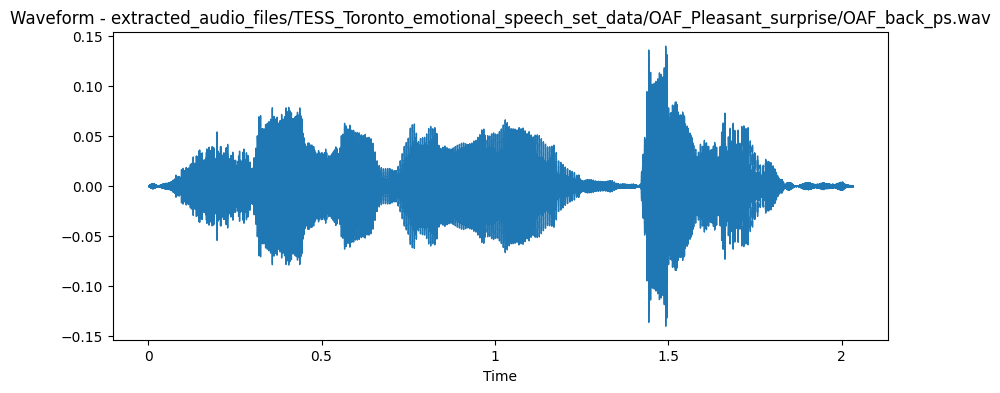

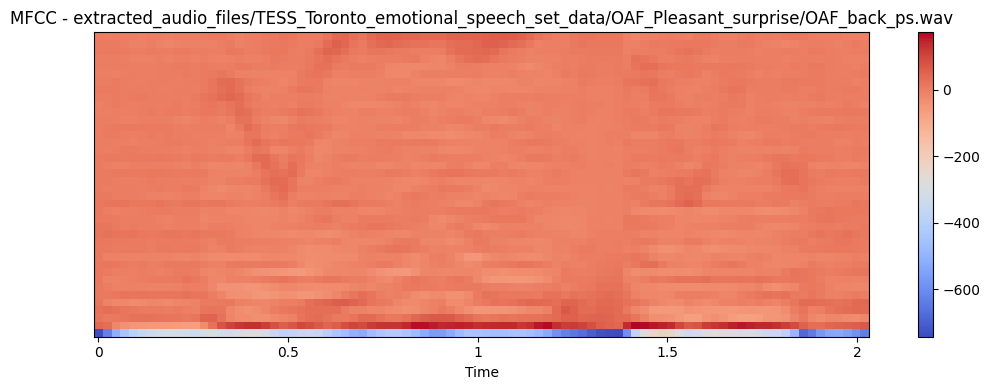

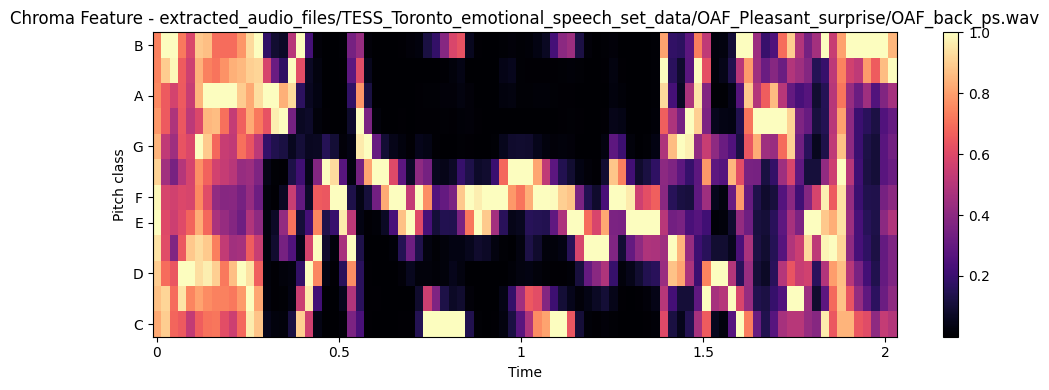

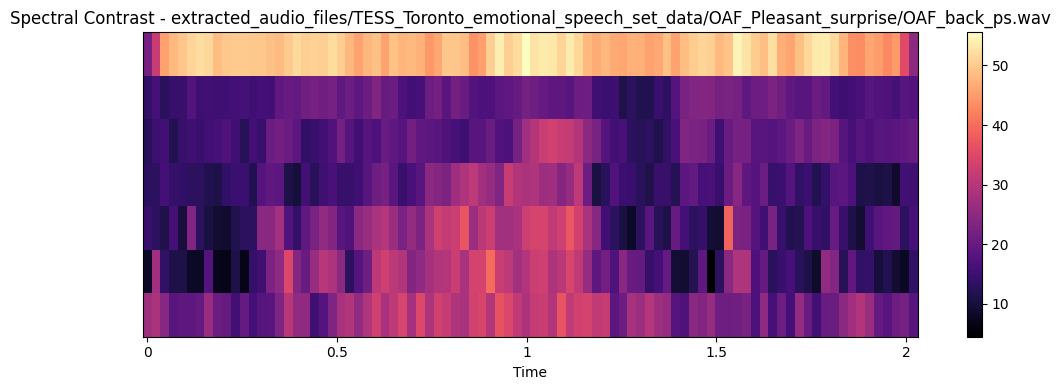

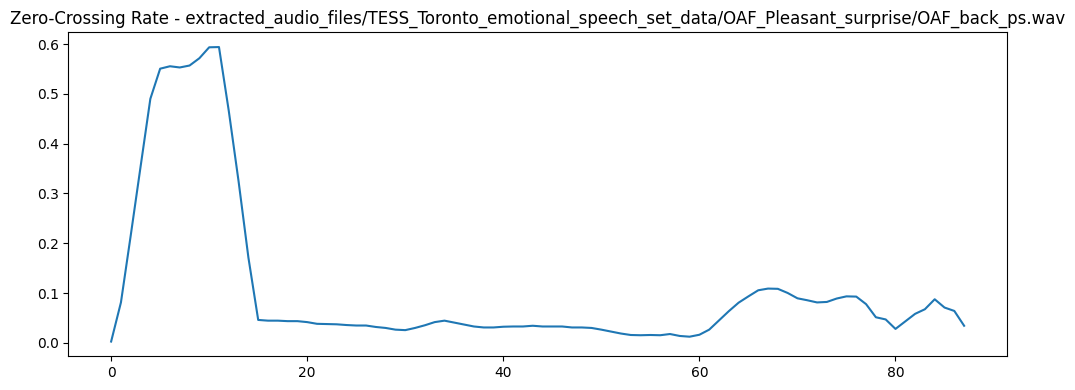


File: extracted_audio_files/TESS_Toronto_emotional_speech_set_data/OAF_Pleasant_surprise/OAF_back_ps.wav
Tempo: 123.05 BPM
Number of beats: 4
MFCC shape: (40, 88)
Chroma shape: (12, 88)
Spectral contrast shape: (7, 88)
Zero-crossing rate shape: (1, 88)

Analyzing file: extracted_audio_files/TESS_Toronto_emotional_speech_set_data/OAF_Sad/OAF_back_sad.wav


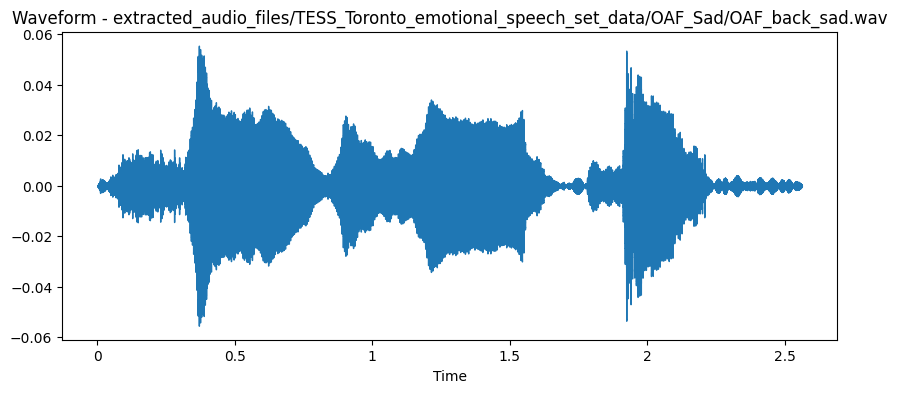

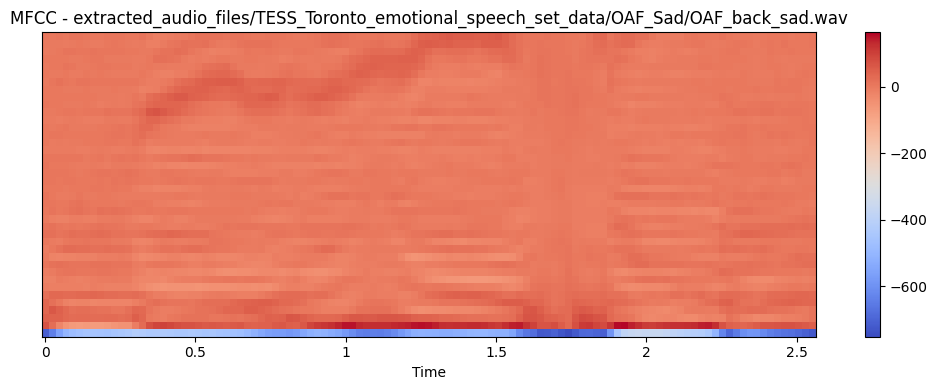

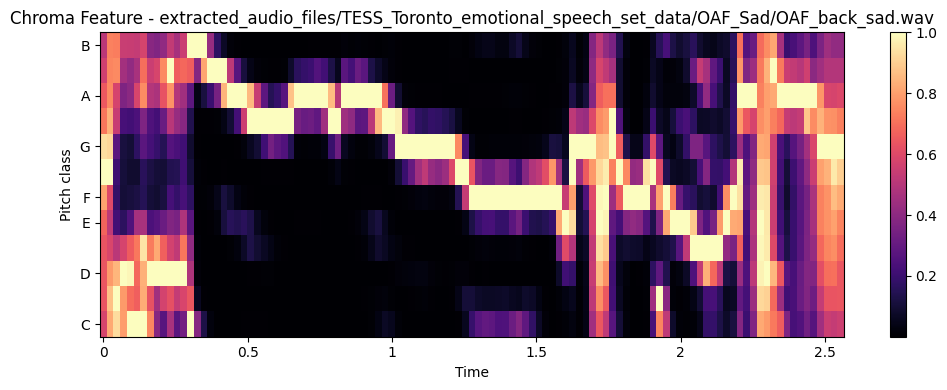